# Robin Basic Test Case

This notebook is intended to simulate passenger demand, analyze service capacity, and visualize various metrics using the `Kernel` and `KernelPlotter` classes from the Robin framework.

## 0. Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

from robin.kernel.entities import Kernel
from robin.plotter.entities import KernelPlotter

## 1. Simulate Passengers Demand

The following cell initializes the `Kernel` object and simulates passenger demand using the `simulate` method. The key parameters used in the simulation are:

- **`path_config_supply`**: Path to the YAML configuration file containing supply data.
- **`path_config_demand`**: Path to the YAML configuration file containing demand data.
- **`seed`**: Random seed for reproducibility of the simulation.
- **`output_path`**: Path to save the simulation results as a CSV file.
- **`departure_time_hard_restriction`**: A boolean parameter that determines whether passengers are strictly restricted to their requested departure times. If `True`, passengers can only depart at their specified times. If `False`, passengers may be assigned to services with flexible departure times.
- **`calculate_global_utility`**: A boolean parameter that determines whether the global utility (a measure of overall satisfaction) is calculated during the simulation. If `True`, the simulation computes this metric; otherwise, it is skipped.

The `simulate` method returns a list of services, each representing a transportation service with its associated passenger demand and other details.

In [2]:
SAVE_PATH = '../reports/figures/test_case'
path_config_supply = '../configs/test_case/supply_data.yaml'
path_config_demand = '../configs/test_case/demand_data.yaml'
path_output_csv = '../data/test_case/output.csv'
seed = 0

kernel = Kernel(path_config_supply, path_config_demand)
services = kernel.simulate(output_path=path_output_csv, seed=seed, departure_time_hard_restriction=False, calculate_global_utility=True)

## 2. Plot Results

This cell initializes a `KernelPlotter` object using the `path_output_csv` and `path_config_supply` variables. The `KernelPlotter` is responsible for creating visualizations based on the simulation results and supply configuration.

In [3]:
kernel_plotter = KernelPlotter(
    path_output_csv=path_output_csv,
    path_config_supply=path_config_supply,
)

This plot provides insights into the status of passenger demand, such as fulfilled and unfulfilled requests.

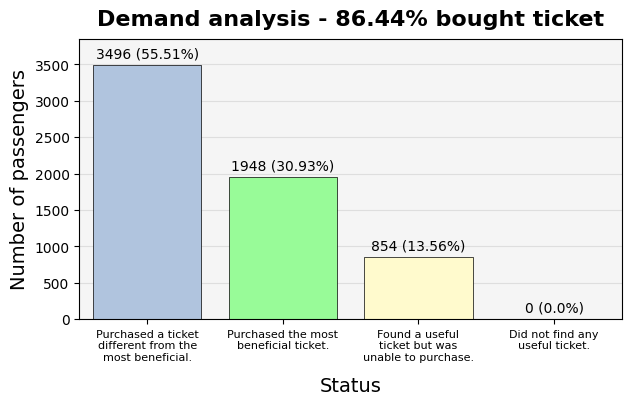

In [4]:
kernel_plotter.plot_demand_status(save_path=f'{SAVE_PATH}/demand_status.pdf')

The plot helps analyze how seats are allocated among passengers illustrating the distribution of seats.

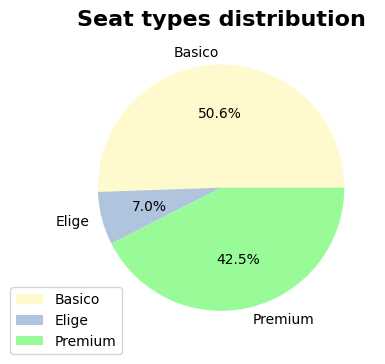

In [5]:
kernel_plotter.plot_seat_distribution(save_path=f'{SAVE_PATH}/seat_distribution.pdf')

This visualization helps track ticket sales trends showing the total number of tickets sold over time.

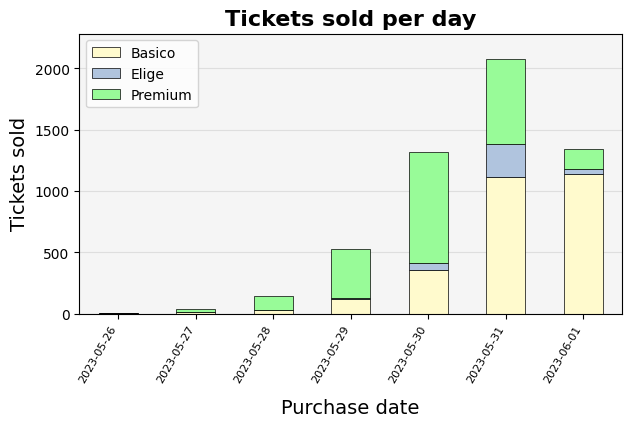

In [6]:
kernel_plotter.plot_tickets_by_date(save_path=f'{SAVE_PATH}/total_tickets_sold.pdf')

This plot provides insights into user behavior and preferences breaking down ticket sales by user type.

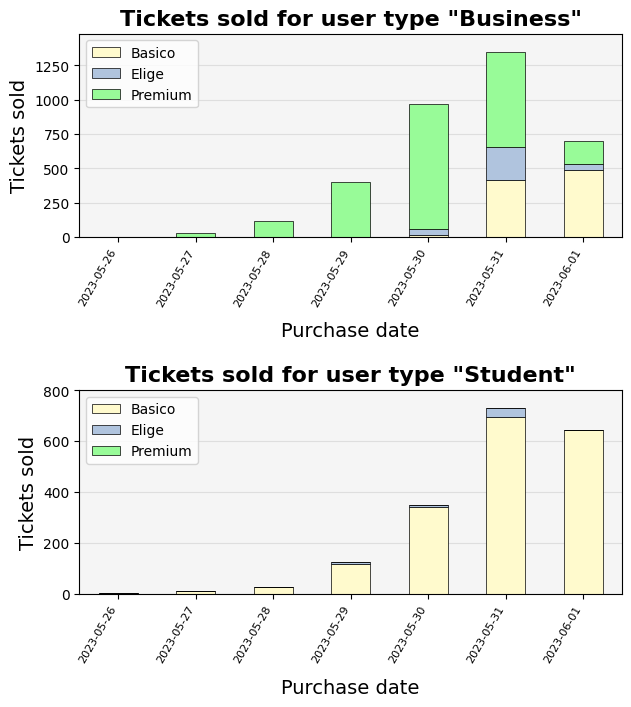

In [7]:
kernel_plotter.plot_tickets_by_user(save_path=f'{SAVE_PATH}/tickets_sold_per_user_type.pdf')

The plot helps analyze how well the service's capacity is utilized showing the capacity utilization of the service with ID `03063_01-06-2023-06.30`.

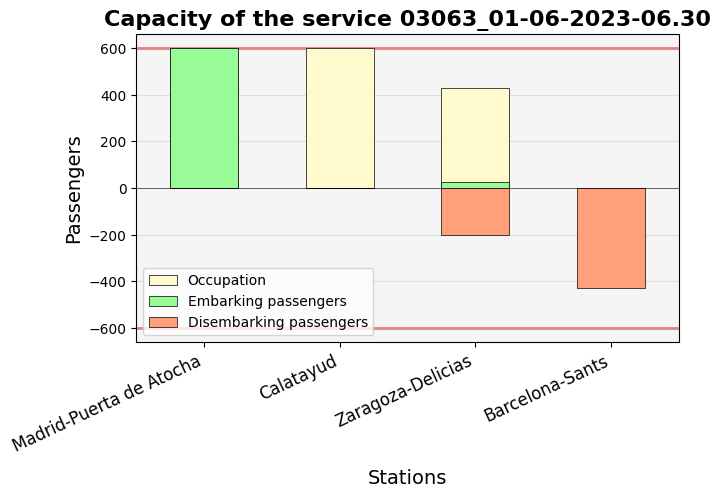

In [8]:
kernel_plotter.plot_service_capacity(
    service_id='03063_01-06-2023-06.30',
    save_path=f'{SAVE_PATH}/capacity_03063_01-06-2023-06.30.pdf'
)

This cell provides similar insights but for the service with ID `06309_01-06-2023-19.30`.

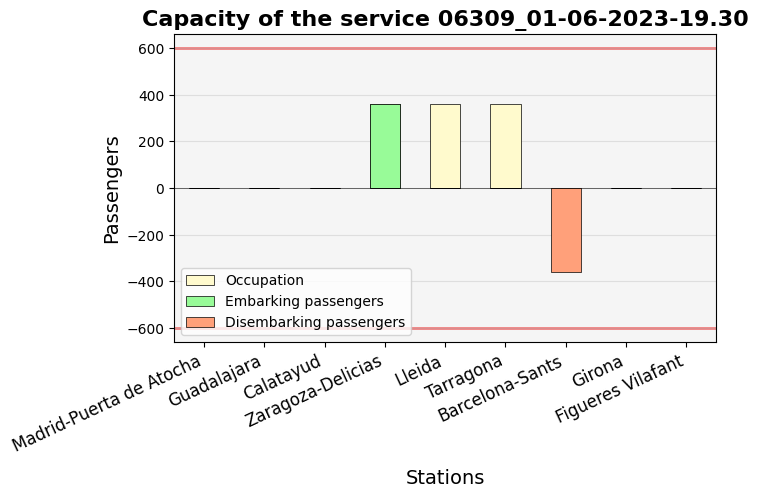

In [9]:
kernel_plotter.plot_service_capacity(
    service_id='06309_01-06-2023-19.30',
    save_path=f'{SAVE_PATH}/capacity_06309_01-06-2023-19.30.pdf'
)

This plot shows the number of tickets sold per trip (origin - destination).

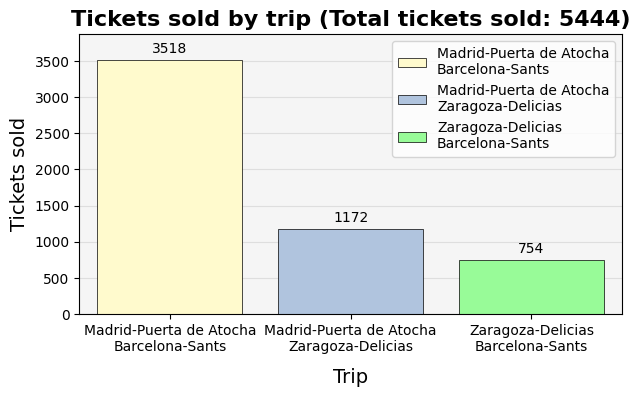

In [10]:
kernel_plotter.plot_tickets_by_trip(save_path=f'{SAVE_PATH}/tickets_sold_per_trip.pdf')

This cell provides a more detailed view of ticket sales disaggregated by seat type.

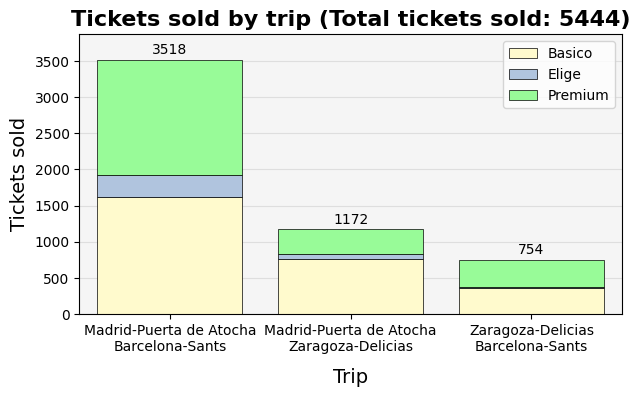

In [11]:
kernel_plotter.plot_tickets_by_trip(save_path=f'{SAVE_PATH}/tickets_sold_per_trip_and_seat_type.pdf', seat_disaggregation=True)